Theory:

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.


 - Anomaly Detection is the process of identifying data points that significantly deviate from the normal pattern of a dataset.

 - Types:

      - Point Anomalies

  - A single data point that is far from others.

  - Example: A taxi fare of $500 for a 2 km ride.

      - Contextual Anomalies

  - Abnormal in a specific context (time, location).

  - Example: 35°C temperature in winter (normal in summer, abnormal in winter).

      - Collective Anomalies

  - A group of data points collectively abnormal.

  - Example: Continuous drop in power consumption for 2 hours due to system fault.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.


  - 1. Isolation Forest

  - Approach: Randomly splits data to isolate points.

  - Key Idea: Anomalies are easier to isolate.

  - Best For: High-dimensional datasets, large datasets.

  - Use Case: Fraud detection, transaction monitoring.

  - 2. DBSCAN

  - Approach: Density-based clustering.

  - Key Idea: Points in low-density areas are anomalies.

  - Best For: Spatial/geographical data.

  - Use Case: GPS trajectory outlier detection.

  - 3. Local Outlier Factor (LOF)

  - Approach: Compares local density of a point with neighbors.

  - Key Idea: Lower density than neighbors → anomaly.

  - Best For: Detecting local anomalies.

  - Use Case: Sensor data anomalies.

Question 3: What are the key components of a Time Series? Explain each with one
example.

  - 1. Trend

  - Long-term upward/downward movement.

  - Example: Increasing airline passengers over years.

  - 2. Seasonality

  - Repeating short-term pattern.

  - Example: Higher sales in December every year.

  - 3. Cyclic Component

  - Long-term fluctuations (not fixed period).

  - Example: Economic boom and recession cycles.

  - 4. Irregular/Noise

  - Random fluctuations.

  - Example: Sudden spike due to one-time event.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

  - A time series is stationary if:

    - Mean is constant

    - Variance is constant

    - Autocorrelation is constant over time

   - Testing Stationarity:

      - ADF Test (Augmented Dickey-Fuller)

      - p-value < 0.05 → stationary

  - Transforming Non-Stationary Series:

      - Differencing

      - Log transformation

      - Seasonal differencing

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.


  - 1. AR (AutoRegressive)

      - Uses past values.

    - Example: yt​=c+ϕyt−1​

	​


  - 2. MA (Moving Average)

    - Uses past forecast errors.

    - Example: yt​=c+θet−1​

	​

  - 3. ARIMA (p,d,q)

      - AR + MA + Differencing

      - For non-seasonal data.

  - 4. SARIMA (p,d,q)(P,D,Q,s)

      - ARIMA + Seasonal terms.

      - For seasonal time series (e.g., monthly data).

  - 5. SARIMAX

      - SARIMA + Exogenous variables.

      - Includes external features (weather, promotions).

Practical:

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

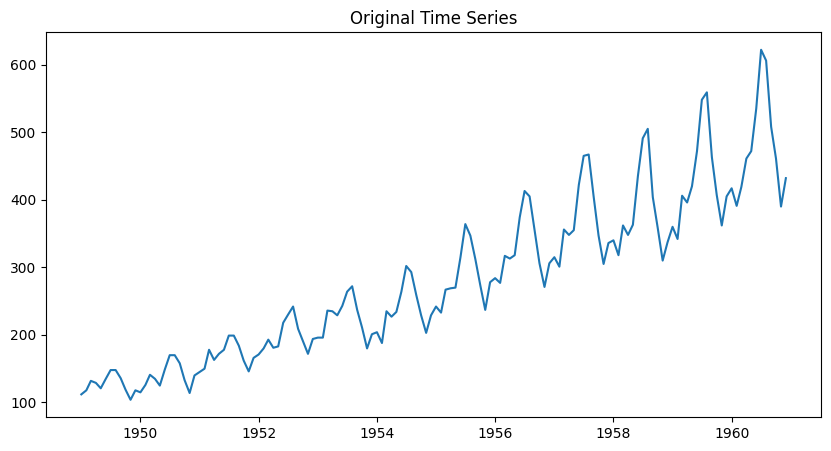

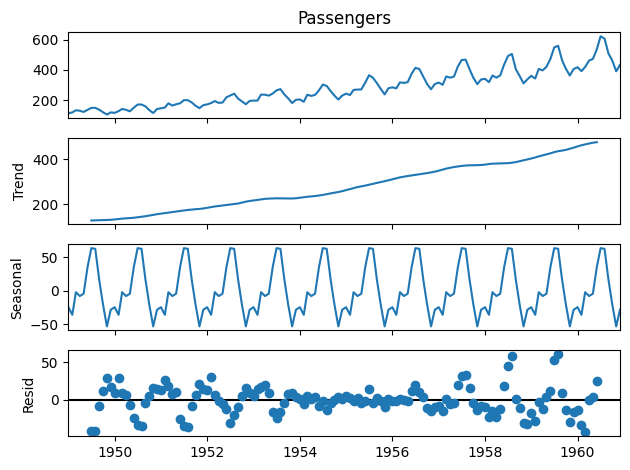

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset correctly
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Convert to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Set frequency (VERY IMPORTANT)
data = data.asfreq('MS')

# Plot original series
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'])
plt.title("Original Time Series")
plt.show()

# Decompose (monthly seasonality = 12)
decomposition = seasonal_decompose(data['Passengers'], model='additive', period=12)

decomposition.plot()
plt.show()


Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.


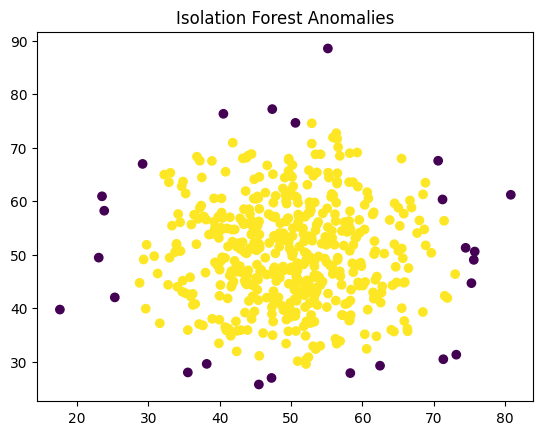

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Sample synthetic data
import numpy as np
np.random.seed(42)
X = np.random.normal(50, 10, (500, 2))

model = IsolationForest(contamination=0.05)
pred = model.fit_predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=pred)
plt.title("Isolation Forest Anomalies")
plt.show()


Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


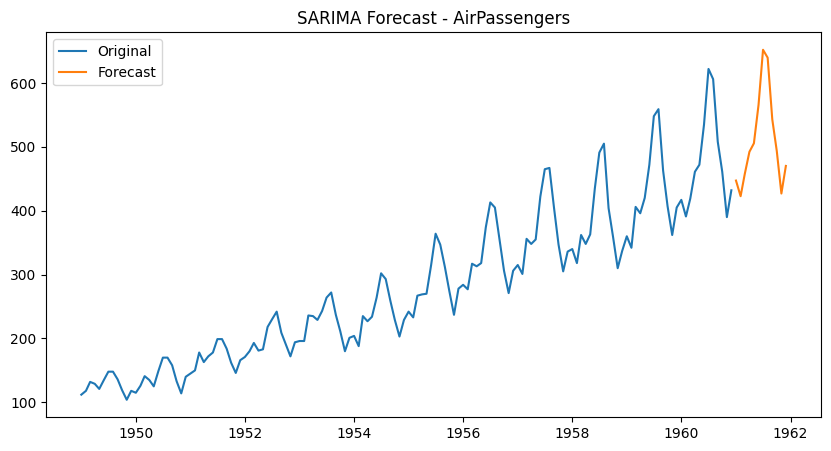

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

# Convert to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data.asfreq('MS')  # Monthly Start frequency

# Build SARIMA model
model = SARIMAX(
    data['Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

# Plot
plt.figure(figsize=(10,5))
plt.plot(data['Passengers'], label='Original')
plt.plot(forecast_mean, label='Forecast')
plt.legend()
plt.title("SARIMA Forecast - AirPassengers")
plt.show()



Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.


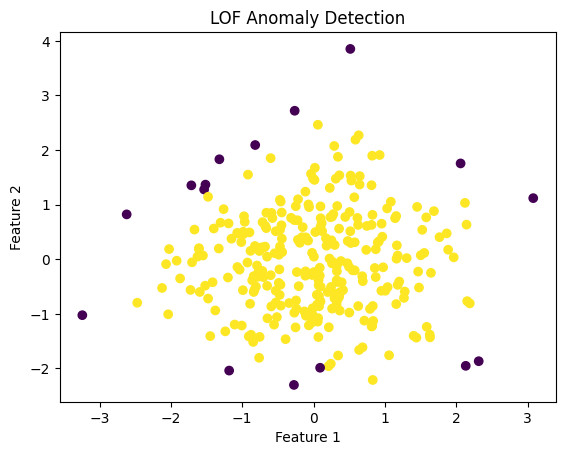

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate sample data
np.random.seed(42)
X = np.random.normal(0, 1, (300, 2))

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# Plot results
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("LOF Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?


   - 1. Anomaly Detection (Streaming)

   - Use Isolation Forest

   - Reason: Works well for high-dimensional, scalable data.

   - Train on historical data, then score streaming batches.

   - 2. Forecasting Model

   - Use SARIMAX

Reason:

   - Handles seasonality (15-min intervals).

   - Includes weather as exogenous variable.

   - 3. Validation & Monitoring

   - Use rolling window validation.

   - Metrics:

   - MAE

   - RMSE

   - MAPE

   - Drift detection using residual monitoring.

   -  4. Business Impact

   - Early detection of faults.

   - Prevent power outages.

   - Optimize load balancing.

   - Reduce operational costs.



In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: Assume df already exists
# df must have datetime index

# Ensure datetime index
df.index = pd.to_datetime(df.index)
df = df.asfreq('15T')

# Train-test split
train = df.iloc[:-96]
test = df.iloc[-96:]

y_train = train['energy']               # target column
weather_train = train[['temperature']]  # must be 2D (double brackets)

y_test = test['energy']
weather_test = test[['temperature']]    # must have 96 rows

print("Train shape:", y_train.shape)
print("Exog train shape:", weather_train.shape)
print("Exog test shape:", weather_test.shape)

# Build model
model = SARIMAX(
    y_train,
    exog=weather_train,
    order=(1,1,1),
    seasonal_order=(1,1,1,96),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit(disp=False)

# Forecast
forecast = result.get_forecast(steps=96, exog=weather_test)
forecast_values = forecast.predicted_mean

print(forecast_values.head())

/tmp/ipython-input-3316892402.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.asfreq('15T')


Train shape: (864,)
Exog train shape: (864, 1)
Exog test shape: (96, 1)


KeyboardInterrupt: 